# Extract tables from PDF starter template

Using [Camelot](https://camelot-py.readthedocs.io/en/master/)
- dependencies include Ghostscript, Tkinter.
- [Apache PDFBox Debugger](https://pdfbox.apache.org/download.html) helpful for identifying x,y coordinates in pdf file.

In [132]:
# import libraries
import camelot
import pandas as pd

In [133]:
# layout1 = '18,692,592,45'
# layout2 = '18,766,592,45'
# layout3 = '18,766,360,45'
# layout_ser = [layout1,layout2,layout2,layout2,layout2,layout2,layout2,layout2,layout2,layout3]
# col_xs = '34,160,292,504'
# col_x_coord_ser = [col_xs,col_xs,col_xs,col_xs,col_xs,col_xs,col_xs,col_xs,col_xs,col_xs]

In [134]:
# Read pdf file
# pdf_file = '/mnt/c/Users/sheblel/Documents/pdf_extraction/input_pdf/Detroit Connect 3-1-3 BBK 5.10.2022.pdf'
pdf_file = '/mnt/c/Users/sheblel/Documents/meta_dd_copy/911_Nature_Code_List_(Basic).pdf'
tables = camelot.read_pdf(pdf_file, 
                          # file reader
                          flavor='stream', 
                          # row sensitivity ( 1=more rows; 100=fewer rows)
                          row_tol=10, 
                          # table regions: coordinates of an approximate region ['x1,y1,x2,y2']
                          table_regions=['18,766,592,46'],
                          # page coordinates containing table ['x1,y1,x2,y2']
                          #table_areas=layout_ser, 
                          # column separator x-coordinate locations
                          #columns=col_xs,
                          # char to strip before saving values
                          strip_text='()\t\n', 
                          # file pages to read
                          pages='1-10'
                          )

## Removed
## space allowed between text edges: edge_tol=36

In [135]:
# Summary of file parsing accuracy for table
tables[0].parsing_report

<TableList n=10>

/tmp/ipykernel_11310/1752971522.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[1], kind='contour').show()


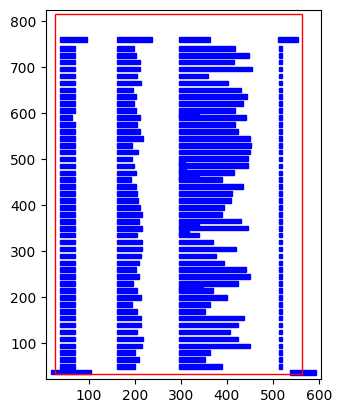

In [136]:
# run matplotlib inline
%matplotlib inline

# show contour plot of page 1 table 
## note:  page interpreted as having one table
camelot.plot(tables[1], kind='contour').show()

In [148]:
# Preview table as pandas df
tables[1].df

,Nature Code,Short Description,Full Description,Call Type
1,343020,FA JH,FELONIOUS ASSAULT JH,P
2,343040,FA RPT,FELONIOUS ASSAULT REPORT,P
3,345020,WEAPON,PERSON WITH WEAPON,P
4,345040,WPNRPT,PERSON W/ A WEAPON REPORT,P
5,346010,KIDNAP,KIDNAPPING,P
6,346030,KIDNAPRP,KIDNAPPING REPORT,P
7,347010,AB IP,ASSAULT AND BATTERY I/P,P
8,347020,AB IP/JH,ASSAULT AND BATTERY IP-JH,P
9,347021,AB JH,ASSAULT AND BATTERY J/H,P
10,347040,ABRPT,ASSAULT AND BATTERY,P


In [138]:
# Number of tables identified
tables

<TableList n=10>

In [139]:
# Dimensions of first table
tables[0]

<Table shape=(44, 4)>

In [140]:
# Type of data structure of table[0]

type(tables[0])

camelot.core.Table

In [141]:
type(tables[0].df)

pandas.core.frame.DataFrame

In [142]:
tables_df_list = []
i = 0
for table in tables:
  table_df = table.df
  table_df.columns = table_df.iloc[0]    # set first table row to column headers
  table_df.drop(table_df.head(1).index,inplace=True)   # drop first row
  if i <= 8:                                      # drop last row for tables 0-8
    table_df.drop(table_df.tail(1).index,inplace=True) 
  tables_df_list.append(table_df)
  i += 1
tables_df_list

[0  Nature Code Short Description                Full Description Call Type
 1          100              BUSN       COMMERCIAL STRUCTURE FIRE         F
 2         100I              BUSN       COMMERCIAL STRUCTURE FIRE         F
 3          110          OSD STRU          OTHR OUTSIDE STRUCTURE         F
 4          111            GARAGE                FIREGARAGE  FIRE         F
 5          120              RESD      RESIDENTIAL STRUCTURE FIRE         F
 6          130               VEH                    VEHICLE FIRE         F
 7          131          VEH/FRWY             VEHICLE FIREFREEWAY         F
 8          132          VEH/ALLY               VEHICLE FIREALLEY         F
 9          133           VEH/FLD               VEHICLE FIREFIELD         F
 10         134           VEH/LOT         VEHICLE FIREPARKING LOT         F
 11         135          VEH/DRWY            VEHICLE FIREDRIVEWAY         F
 12         136          VEH/STRT              VEHICLE FIRESTREET         F
 13         

In [143]:
# data type confirmation
type(tables_df_list)

list

In [144]:
# concatanate dfs into 1 df
tables_combined_df = pd.concat(tables_df_list)

In [146]:
# preview, dimensions of tables_combined_df
tables_combined_df

,Nature Code,Short Description,Full Description,Call Type
1,100,BUSN,COMMERCIAL STRUCTURE FIRE,F
2,100I,BUSN,COMMERCIAL STRUCTURE FIRE,F
3,110,OSD STRU,OTHR OUTSIDE STRUCTURE,F
4,111,GARAGE,FIREGARAGE FIRE,F
5,120,RESD,RESIDENTIAL STRUCTURE FIRE,F
...,...,...,...,...
22,XFER2,XFER2,DELTASEVER PAIN SHOCK OR,E
23,XFER3,XFER3,HEMORRHAGEACUITY 1 2 OR 3,E
24,XPOSE1,XPOSE1,EXPOSURE DELTA,E
25,XPOSE2,XPOSE2,EXPOSURE UNK STATUS,E


In [153]:
# write to csv using pandas
tables_combined_df.to_csv('/mnt/c/Users/sheblel/Documents/meta_dd_copy/911_Nature_Code_List_basic_20240327.csv')

In [ ]:
# uses camelot i/o, returns first page as a csv
# csv_out_file = '/mnt/c/Users/sheblel/Documents/meta_dd_copy/911_Nature_Code_List_basic_20240327.csv'
# tables[0].to_csv(csv_out_file)

In [ ]:
# Export all tables: uses camelot i/o, 
# excel version returns each page's table as a separate excel wkst
# csv version returns one (first) page as csv
# excel_out_file = '/mnt/c/Users/sheblel/Documents/pdf_extraction/input_pdf/Detroit Connect 3-1-3 BBK 5.10.2022_stream_p1-10.xlsx'
# csv_out_file = '/mnt/c/Users/sheblel/Documents/pdf_extraction/input_pdf/Detroit Connect 3-1-3 BBK 5.10.2022_stream_t1.csv'
# excel_out_file = '/mnt/c/Users/sheblel/Documents/meta_dd_copy/911_Nature_Code_List_Basic.xlsx'
# csv_out_file = '/mnt/c/Users/sheblel/Documents/meta_dd_copy/911_Nature_Code_List_Basic.csv'
# tables.export(excel_out_file, 
#               f='excel', 
#               index = False,
#               header = True,
#               compress=True)